In [19]:
import pandas as pd

df_benin = pd.read_csv("../data/benin-malanville.csv")
df_sierra = pd.read_csv("../data/sierraleone-bumbuna.csv")
df_togo = pd.read_csv("../data/togo-dapaong_qc.csv")


In [9]:
import os
os.listdir("../data")


['benin-malanville.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']

In [11]:
import pandas as pd

# Load dataset
df_benin = pd.read_csv("../data/benin-malanville.csv")

# Quick look at data
df_benin.head()
df_benin.info()
df_benin.describe()
df_benin.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [13]:
from scipy import stats
import numpy as np

# Compute Z-scores for numeric columns
numeric_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z_scores = np.abs(stats.zscore(df_benin[numeric_cols], nan_policy='omit'))

# Flag rows with outliers
outliers = (z_scores > 3).any(axis=1)
df_benin_clean = df_benin[~outliers].copy()

# Fill missing values (median)
df_benin_clean[numeric_cols] = df_benin_clean[numeric_cols].fillna(df_benin_clean[numeric_cols].median())


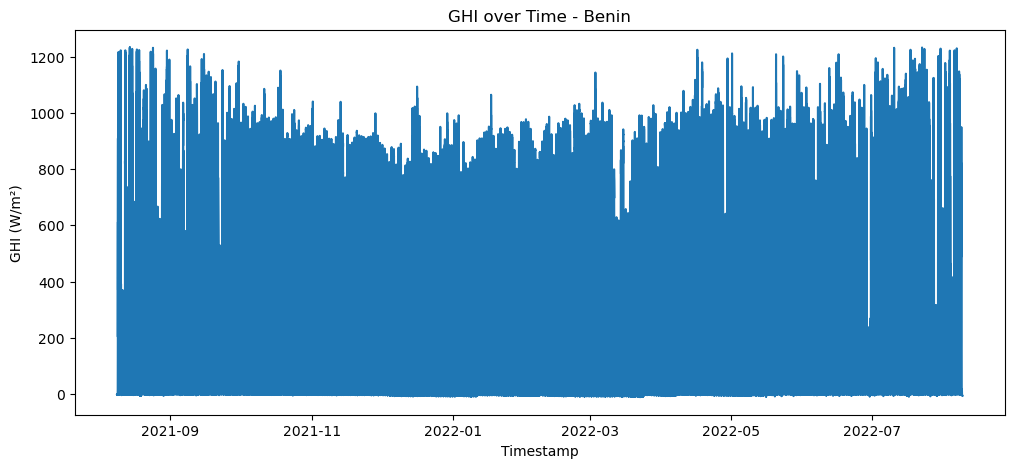

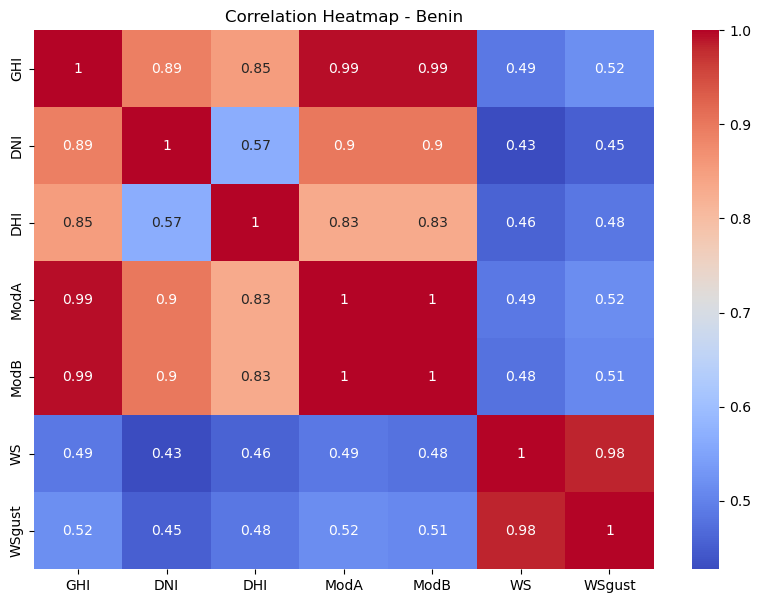

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df_benin_clean['Timestamp'] = pd.to_datetime(df_benin_clean['Timestamp'])

# Plot GHI over time
plt.figure(figsize=(12,5))
plt.plot(df_benin_clean['Timestamp'], df_benin_clean['GHI'])
plt.title('GHI over Time - Benin')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10,7))
sns.heatmap(df_benin_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Benin')
plt.show()


In [15]:
df_cleaning = df_benin_clean.groupby('Cleaning')[['ModA','ModB']].mean()
print(df_cleaning)


                ModA       ModB
Cleaning                       
0         232.323881  224.95509
1         306.610124  301.45000


In [17]:
df_benin_clean.to_csv("../data/benin_clean.csv", index=False)


In [1]:
# ======================================
# Step 0: Import libraries
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Optional for nicer plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# ======================================
# Step 1: Load datasets
# ======================================
datasets = {
    "Benin": "../data/benin-malanville.csv",
    "SierraLeone": "../data/sierraleone-bumbuna.csv",
    "Togo": "../data/togo-dapaong_qc.csv"
}

dfs = {country: pd.read_csv(path) for country, path in datasets.items()}

# ======================================
# Step 2: Summary statistics & missing values
# ======================================
for country, df in dfs.items():
    print(f"--- {country} ---")
    print("Shape:", df.shape)
    print("Missing values:\n", df.isna().sum())
    print("Columns with >5% missing:\n", df.columns[df.isna().mean() > 0.05])
    print(df.describe())
    print("\n")

# ======================================
# Step 3: Outlier detection using Z-score
# ======================================
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

for country, df in dfs.items():
    z_scores = np.abs(df[cols_to_check].apply(zscore))
    outliers = (z_scores > 3).any(axis=1)


--- Benin ---
Shape: (525600, 19)
Missing values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Columns with >5% missing:
 Index(['Comments'], dtype='object')
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%

In [20]:
# Summary statistics
df_benin.describe()
df_benin.isna().sum()   # List columns with >5% nulls


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

C:\Users\It's Blue\AppData\Local\Temp\ipykernel_55476\1460259906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benin_clean['Timestamp'] = pd.to_datetime(df_benin_clean['Timestamp'])


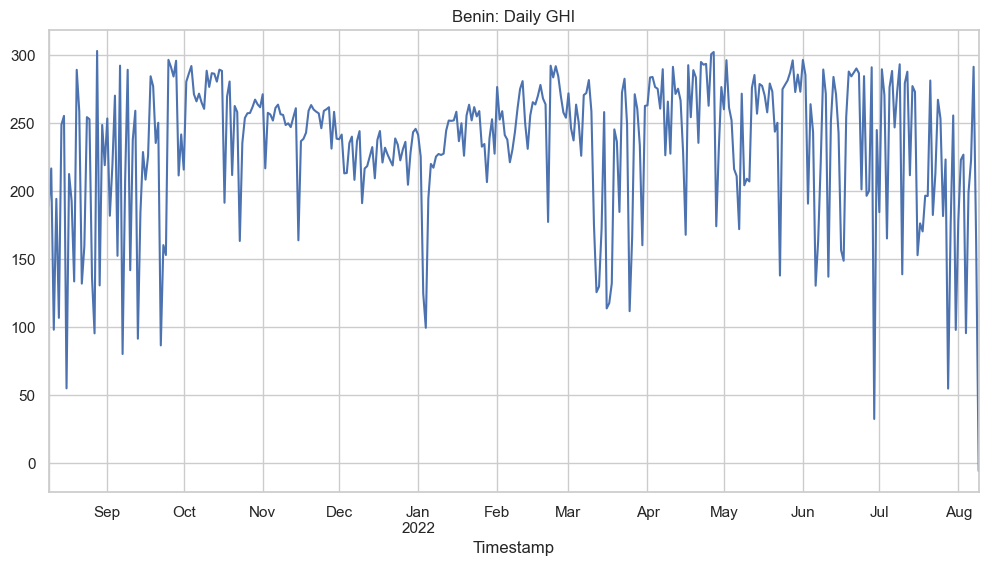

C:\Users\It's Blue\AppData\Local\Temp\ipykernel_55476\1460259906.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_benin_clean['GHI'].resample('M').mean().plot(title="Benin: Monthly GHI")


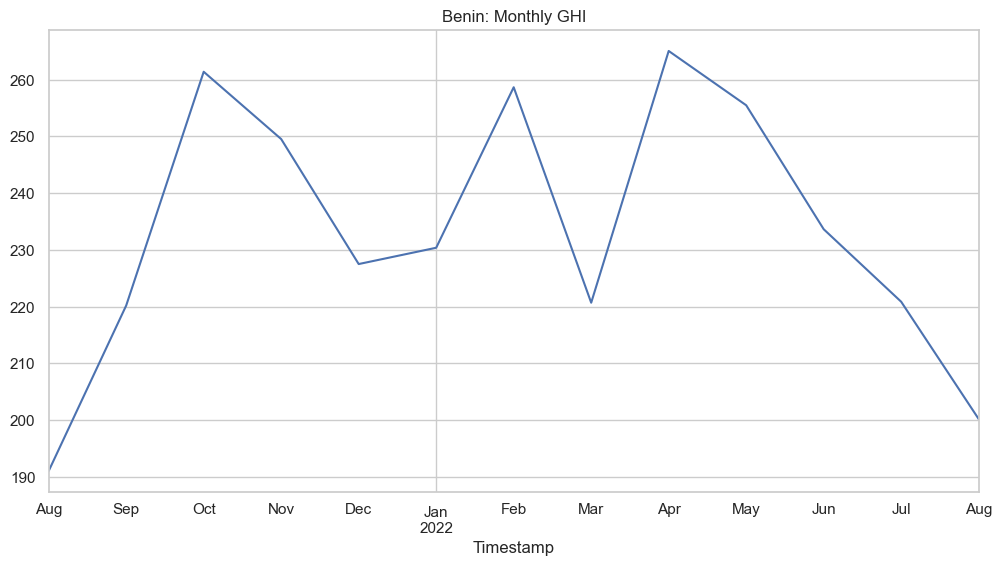

In [24]:
import matplotlib.pyplot as plt

df_benin_clean['Timestamp'] = pd.to_datetime(df_benin_clean['Timestamp'])
df_benin_clean.set_index('Timestamp', inplace=True)

# Daily GHI trend
df_benin_clean['GHI'].resample('D').mean().plot(title="Benin: Daily GHI")
plt.show()

# Monthly GHI trend
df_benin_clean['GHI'].resample('M').mean().plot(title="Benin: Monthly GHI")
plt.show()


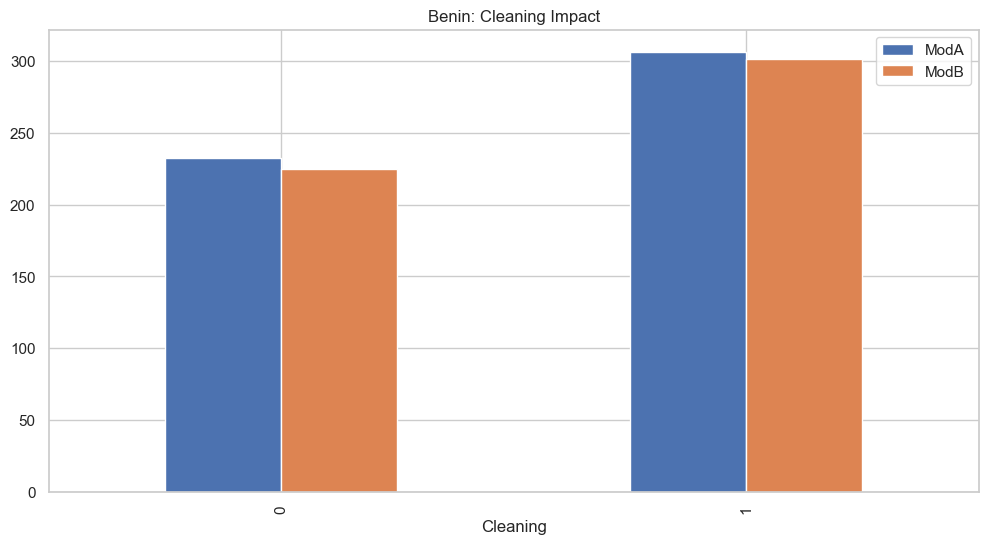

In [25]:
df_benin_clean.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', title='Benin: Cleaning Impact')
plt.show()


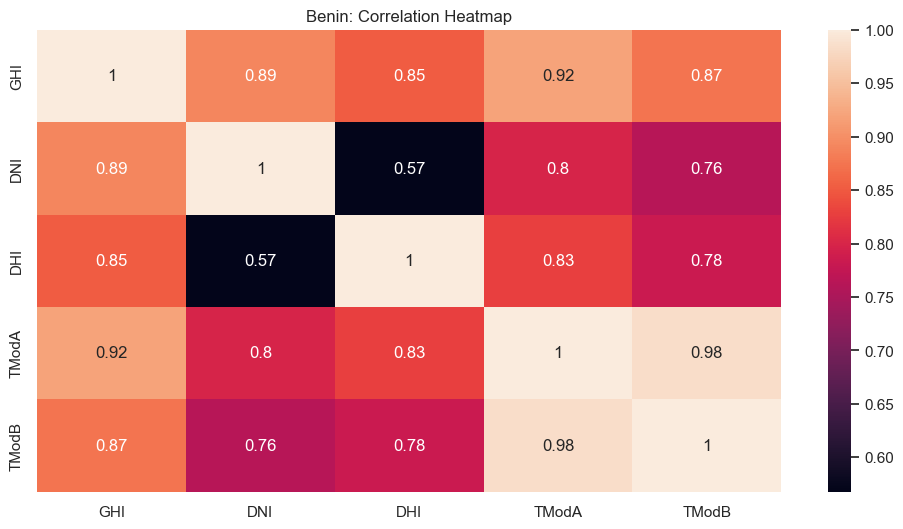

In [26]:
import seaborn as sns

sns.heatmap(df_benin_clean[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True)
plt.title("Benin: Correlation Heatmap")
plt.show()


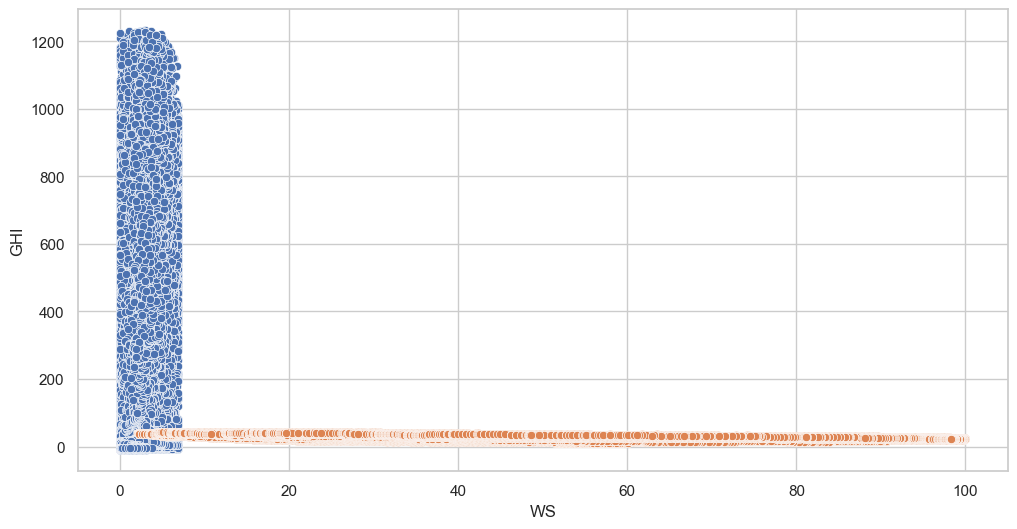

In [27]:
sns.scatterplot(x='WS', y='GHI', data=df_benin_clean)
sns.scatterplot(x='RH', y='Tamb', data=df_benin_clean)
plt.show()


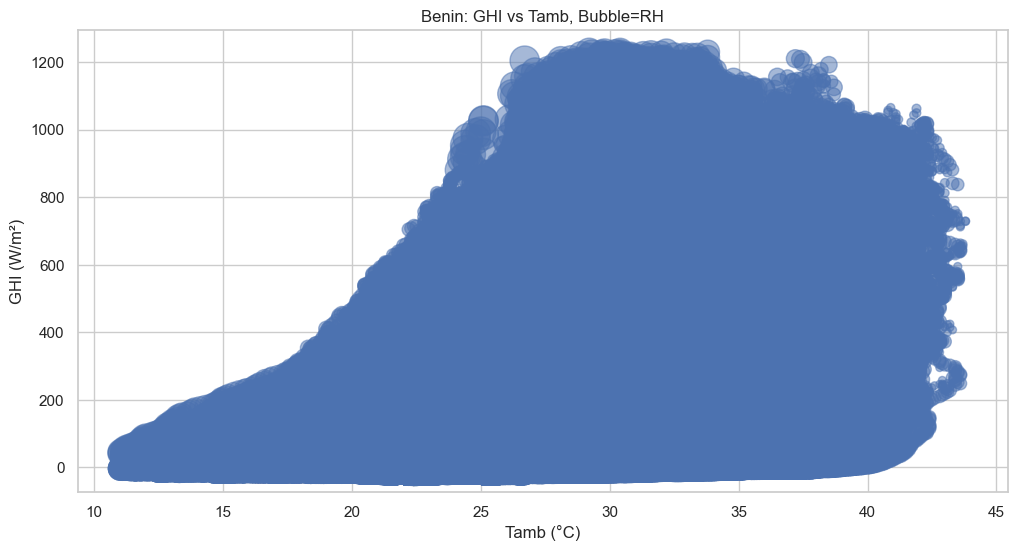

In [28]:
plt.scatter(df_benin_clean['Tamb'], df_benin_clean['GHI'],
            s=df_benin_clean['RH']*5, alpha=0.5)
plt.xlabel("Tamb (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("Benin: GHI vs Tamb, Bubble=RH")
plt.show()


In [29]:
# Numeric stats
df.describe()

# Missing values
df.isna().sum()

# Columns with >5% missing
(df.isna().sum() / len(df)) * 100


Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [30]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [31]:
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [32]:
(df.isna().sum() / len(df)) * 100

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [33]:
# Numeric stats
df.describe()

# Missing values
df.isna().sum()

# Columns with >5% missing
(df.isna().sum() / len(df)) * 100


Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [35]:
from scipy.stats import zscore

key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Create Z-score columns for each key column
for col in key_cols:
    df[col + '_zscore'] = zscore(df[col])

# Now flag outliers where |Z| > 3
outliers = df[(df[[col + '_zscore' for col in key_cols]].abs() > 3).any(axis=1)]


In [37]:

import pandas as pd
from scipy.stats import zscore
import os

# Define dataset paths
datasets = {
    "benin": "../data/benin-malanville.csv",
    "sierra": "../data/sierraleone-bumbuna.csv",
    "togo": "../data/togo-dapaong_qc.csv"
}

# Folder to save cleaned data
clean_folder = "data/cleaned"
os.makedirs(clean_folder, exist_ok=True)

# Columns to compute Z-scores on
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

for country, path in datasets.items():
    # Load CSV
    df = pd.read_csv(path)
    
    # Compute Z-scores and flag outliers
    for col in key_cols:
        df[col + '_zscore'] = zscore(df[col])
    
    # Remove outliers: |Z| > 3
    for col in key_cols:
        df.loc[df[col + '_zscore'].abs() > 3, col] = df[col].median()
    
    # Optionally drop Z-score columns after cleaning
    df.drop(columns=[col + '_zscore' for col in key_cols], inplace=True)
    
    # Save cleaned CSV
    clean_path = os.path.join(clean_folder, f"{country}_clean.csv")
    df.to_csv(clean_path, index=False)
    
    print(f"{country} dataset cleaned and saved to {clean_path}")



benin dataset cleaned and saved to data/cleaned\benin_clean.csv
sierra dataset cleaned and saved to data/cleaned\sierra_clean.csv
togo dataset cleaned and saved to data/cleaned\togo_clean.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Folder with cleaned data
clean_folder = "data/cleaned"
plots_folder = "plots"
os.makedirs(plots_folder, exist_ok=True)

# List of cleaned CSVs
datasets = {
    "benin": os.path.join(clean_folder, "benin_clean.csv"),
    "sierra": os.path.join(clean_folder, "sierra_clean.csv"),
    "togo": os.path.join(clean_folder, "togo_clean.csv")
}

for country, path in datasets.items():
    df = pd.read_csv(path)
    
    print(f"\n--- EDA for {country} ---\n")
    
    # 1. Summary stats & missing values
    print(df.describe())
    print("\nMissing values:\n", df.isna().sum())
    
    # 2. Time series plots for GHI, DNI, DHI, Tamb
    time_cols = ['GHI','DNI','DHI','Tamb']
    plt.figure(figsize=(12,6))
    for col in time_cols:
        if col in df.columns:
            plt.plot(pd.to_datetime(df['Timestamp']), df[col], label=col)
    plt.title(f"{country} Time Series")
    plt.xlabel("Timestamp")
    plt.ylabel("Values")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{country}_timeseries.png"))
    plt.close()
    
    # 3. Cleaning impact (assuming 'Cleaning' column exists)
    if 'Cleaning' in df.columns:
        df.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', figsize=(8,6))
        plt.title(f"{country} - Cleaning Impact on ModA & ModB")
        plt.savefig(os.path.join(plots_folder, f"{country}_cleaning_impact.png"))
        plt.close()
    
    # 4. Correlation heatmap
    corr_cols = ['GHI','DNI','DHI','ModA','ModB']
    corr = df[corr_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f"{country} Correlation Heatmap")
    plt.savefig(os.path.join(plots_folder, f"{country}_correlation.png"))
    plt.close()
    
    # 5. Scatter plots: WS, WSgust, WD vs GHI; RH vs Tamb or RH vs GHI
    scatter_cols = ['WS','WSgust','WD']
    for col in scatter_cols:
        if col in df.columns and 'GHI' in df.columns:
            sns.scatterplot(x=col, y='GHI', data=df)
            plt.title(f"{country}: GHI vs {col}")
            plt.savefig(os.path.join(plots_folder, f"{country}_GHI_vs_{col}.png"))
            plt.close()
    
    if 'RH' in df.columns:
        if 'Tamb' in df.columns:
            sns.scatterplot(x='RH', y='Tamb', data=df)
            plt.title(f"{country}: Tamb vs RH")
            plt.savefig(os.path.join(plots_folder, f"{country}_Tamb_vs_RH.png"))
            plt.close()
        if 'GHI' in df.columns:
            sns.scatterplot(x='RH', y='GHI', data=df)
            plt.title(f"{country}: GHI vs RH")
            plt.savefig(os.path.join(plots_folder, f"{country}_GHI_vs_RH.png"))
            plt.close()
    
    # 6. Wind rose or histogram plots
    if 'WS' in df.columns and 'WD' in df.columns:
        plt.figure(figsize=(6,6))
        plt.hist(df['WS'], bins=20, alpha=0.7)
        plt.title(f"{country} Wind Speed Distribution")
        plt.savefig(os.path.join(plots_folder, f"{country}_WS_hist.png"))
        plt.close()
    
    # 7. Bubble chart: GHI vs Tamb with RH size
    if all(x in df.columns for x in ['GHI','Tamb','RH']):
        plt.figure(figsize=(8,6))
        plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
        plt.xlabel("GHI")
        plt.ylabel("Tamb")
        plt.title(f"{country} Bubble Chart (size=RH)")
        plt.savefig(os.path.join(plots_folder, f"{country}_bubble.png"))
        plt.close()
    
    print(f"Plots for {country} saved in {plots_folder}/")



--- EDA for benin ---

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.342811     167.187516     110.906983     236.524528   
std       330.868308     261.710501     152.916844     326.815176   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       482.900000     314.200000     210.500000     463.600000   
max      1233.000000     952.300000     591.400000    1215.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.737160      28.179683      54.487969       2.082432   
std       316.357415       5.924297      28.073069       1.521898   
min         0.000000      11.000000       2.100000       0.000000   
25%      

KeyboardInterrupt: 

In [42]:
df_sierra = pd.read_csv("../data/sierraleone-bumbuna.csv")
df_togo = pd.read_csv("../data/togo-dapaong_qc.csv")


In [48]:
import pandas as pd

df_sierra = pd.read_csv("../data/sierraleone-bumbuna.csv")
df_togo = pd.read_csv("../data/togo-dapaong_qc.csv")


In [49]:
from scipy.stats import zscore
import numpy as np

# Key columns to clean
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Sierra Leone: compute Z-scores
df_sierra_z = df_sierra[key_cols].apply(zscore)
outliers_sierra = df_sierra[(df_sierra_z.abs() > 3).any(axis=1)]

# Impute missing values with median
df_sierra_clean = df_sierra.copy()
for col in key_cols:
    df_sierra_clean[col].fillna(df_sierra_clean[col].median(), inplace=True)

# Togo: same process
df_togo_z = df_togo[key_cols].apply(zscore)
outliers_togo = df_togo[(df_togo_z.abs() > 3).any(axis=1)]

df_togo_clean = df_togo.copy()
for col in key_cols:
    df_togo_clean[col].fillna(df_togo_clean[col].median(), inplace=True)


C:\Users\It's Blue\AppData\Local\Temp\ipykernel_55476\4064397942.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sierra_clean[col].fillna(df_sierra_clean[col].median(), inplace=True)
C:\Users\It's Blue\AppData\Local\Temp\ipykernel_55476\4064397942.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [23]:
import pandas as pd

df_benin = pd.read_csv("../data/benin-malanville.csv")
df_sierra = pd.read_csv("../data/sierraleone-bumbuna.csv")
df_togo = pd.read_csv("../data/togo-dapaong_qc.csv")


In [2]:
import pandas as pd
from scipy.stats import zscore
import os

# Make sure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# List of datasets
datasets = {
    "benin": "../data/benin-malanville.csv",
    "sierra": "../data/sierraleone-bumbuna.csv",
    "togo": "../data/togo-dapaong_qc.csv"
}

# Columns to clean/check for outliers
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Loop through each dataset
for country, path in datasets.items():
    print(f"\nProcessing {country} dataset...")
    
    # Load dataset
    df = pd.read_csv(path)
    
    # Copy for cleaning
    df_clean = df.copy()
    
    # Compute Z-scores and flag outliers
    z_scores = df_clean[key_cols].apply(zscore, nan_policy='omit')
    outlier_mask = (z_scores.abs() > 3)
    
    # Replace outliers with NaN for later imputation
    df_clean[key_cols] = df_clean[key_cols].mask(outlier_mask)
    
    # Fill missing values with median
    df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())
    
    # Save cleaned dataset
    clean_path = f"data/{country}_clean.csv"
    df_clean.to_csv(clean_path, index=False)
    
    print(f"Cleaned dataset saved to {clean_path}")



Processing benin dataset...
Cleaned dataset saved to data/benin_clean.csv

Processing sierra dataset...
Cleaned dataset saved to data/sierra_clean.csv

Processing togo dataset...
Cleaned dataset saved to data/togo_clean.csv
